<a href="https://colab.research.google.com/github/SDS-AAU/Intro-2019/blob/master/notebooks/M1_S3_4_Python_translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np


The first part is 90% the same in python. No need for a translation
## 2.2. Object classes

Python and R objects are similar but there are some considerable differences
R vectors can be roughly translated to lists in python.
Below, we will try to do some of the presented operations in python.

In [0]:
# [] initiate a list

v1 = [1,5,11,33]
v1

[1, 5, 11, 33]

In [0]:
v2 = ["hello","world"]
v2

['hello', 'world']

In [0]:
v3 = [True, True, False, True]
v3

[True, True, False, True]

Combining different types of elements in one vector will coerce the elements to the least restrictive type when using R

In python you obtain a list of lists with all elements in their original format

In [0]:
v4 =[v1, v2, v3, 'boo']
v4

[[1, 5, 11, 33], ['hello', 'world'], [True, True, False], 'boo']

Integers (numbers) are still numbers, not strings (text). Easy to see because they don't have ' '

Element-wise operations: 
Are not possible with lists in the same way as in R. Addition will just lead to appending lists.
Yet, you can achieve the same functionality using numpy.arrays rather than lists.

In [0]:
v1 + v3

[1, 5, 11, 33, True, True, False, True]

In [0]:
np.array(v1) + np.array(v3)

array([ 2,  6, 11, 34])

NumPy is a library, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. Here, you can already see that R comes from Maths and Stats, while Python is a CS language.

In [0]:
# Same for multiplication
v1 * 2

[1, 5, 11, 33, 1, 5, 11, 33]

To do math, we need to transform the list into an array

In [0]:
v1_array  = np.array(v1)

v1_array * 2

array([ 2, 10, 22, 66])

In [0]:
# What works in R, doesn't necessarily work in Python (probably there is some way to get there but just 
# running + gives you an error)
v1_array + np.array([1,7])

ValueError: ignored

In [0]:
# that works the same way
sum(v1)

50

For more maths you need to engage numpy or other modules (Python is not a maths language)

In [0]:
np.mean(v1)

12.5

In [0]:
# Standard deviation for population - DeltaDegreesOfFreedom = 0 by default
np.std(v1, ddof=0)

12.359207094308275

In [0]:
# This will give you the same as R

np.std(v1, ddof=1)

14.27118308573843

In [0]:
np.corrcoef(v1_array,v1_array*5)

array([[1., 1.],
       [1., 1.]])

In [0]:
v1_array > 2

array([False,  True,  True,  True])

The majority of the contents before 2.2.5 can be found in this cheat sheet

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf

## 2.2.5 Data Frames

In Python Data Frames are managed by Pandas, a very comprehensive library for data manipulation and analysis

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [0]:
# We construct the DF from a dictionary which is indicated by {'some_key':['some_values']}

dfr1 = pd.DataFrame(
    {'ID':range(1,5), # Python counts from 0 and the last value in a range is excluded
     'FirstName':["Jesper","Jonas","Pernille","Helle"],
     'Female':[False,False,True,True],
     'Age':[22,33,44,55]
})

In [0]:
# Python doesn't really do much factors and as you can see pandas understood your input formats
dfr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
ID           4 non-null int64
FirstName    4 non-null object
Female       4 non-null bool
Age          4 non-null int64
dtypes: bool(1), int64(2), object(1)
memory usage: 180.0+ bytes


In [0]:
dfr1.FirstName #dot notation

0      Jesper
1       Jonas
2    Pernille
3       Helle
Name: FirstName, dtype: object

In [0]:
dfr1['FirstName'] #more traditional subsetting

0      Jesper
1       Jonas
2    Pernille
3       Helle
Name: FirstName, dtype: object

In [0]:
dfr1.loc[:,'FirstName'] #more complex subsetting

0      Jesper
1       Jonas
2    Pernille
3       Helle
Name: FirstName, dtype: object

In [0]:
dfr1.iloc[:,1] #index based

0      Jesper
1       Jonas
2    Pernille
3       Helle
Name: FirstName, dtype: object

In [0]:
# Rows 1 and 2, columns 3 and 4 - the gender and age of Jesper & Jonas
dfr1.iloc[[0,1],[2,3]]


,Female,Age
0,False,22
1,False,33


In [0]:
#Same thing
dfr1.loc[[0,1],['Female','Age']]

,Female,Age
0,False,22
1,False,33


In [0]:
# Rows 1 and 3, all columns

dfr1.iloc[[0,2],:] # don't forget to count index-1 when going from R to python

,ID,FirstName,Female,Age
0,1,Jesper,False,22
2,3,Pernille,True,44


In [0]:
#Find the names of everyone over the age of 30 in the data
dfr1[dfr1.Age > 30]

,ID,FirstName,Female,Age
1,2,Jonas,False,33
2,3,Pernille,True,44
3,4,Helle,True,55


In [0]:
# or "Query style" (There are always many ways of doing the same thing)

dfr1.query('Age > 30')

,ID,FirstName,Female,Age
1,2,Jonas,False,33
2,3,Pernille,True,44
3,4,Helle,True,55


## 2.2.6 Flow Control (loops & friends)

Python is made for readability and therefor tabs and new lines have syntax meaning


In [0]:
x = 5 
y = 10

if (x==0):
  y = 0 
else:
  y = y/x  
  print(y)

2.0


In [0]:
for i in range(1,x+1):
  print("OMG, i just counted to " + str(i))

OMG, i just counted to 1
OMG, i just counted to 2
OMG, i just counted to 3
OMG, i just counted to 4
OMG, i just counted to 5


In [0]:
while x > 0:
  print(x) 
  x = x-1

5
4
3
2
1


In [0]:
while True: #kind of like repeat in R
  print(x)
  x = x + 1
  if x > 7:
    break

0
1
2
3
4
5
6
7


Python does not have pipes. Yet, much of the piping is very similar to dot "." in Python

In [0]:
starwars = pd.read_csv("http://sds-datacrunch.aau.dk/public/characters.csv")

Python does not offer the same consistant verb and pipe grammer. But it's OK :-)

More on that here: https://gist.github.com/conormm/fd8b1980c28dd21cfaf6975c86c74d07

In [0]:
# filter

starwars[starwars['species'] == 'Droid']

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
1,C-3PO,167.0,75.0,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,NaN,Tatooine,Droid
21,IG-88,200.0,140.0,none,metal,red,15BBY,none,NaN,Droid
84,BB8,NaN,NaN,none,none,black,NaN,none,NaN,Droid


In [0]:
# select

starwars[['name','homeworld']].head(10)

,name,homeworld
0,Luke Skywalker,Tatooine
1,C-3PO,Tatooine
2,R2-D2,Naboo
3,Darth Vader,Tatooine
4,Leia Organa,Alderaan
5,Owen Lars,Tatooine
6,Beru Whitesun lars,Tatooine
7,R5-D4,Tatooine
8,Biggs Darklighter,Tatooine
9,Obi-Wan Kenobi,Stewjon


In [0]:
starwars.drop(['birth_year','skin_color'], axis=1).head(10)

,name,height,mass,hair_color,eye_color,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,blue,male,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,yellow,NaN,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,red,NaN,Naboo,Droid
3,Darth Vader,202.0,136.0,none,yellow,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,brown,female,Alderaan,Human
5,Owen Lars,178.0,120.0,"brown, grey",blue,male,Tatooine,Human
6,Beru Whitesun lars,165.0,75.0,brown,blue,female,Tatooine,Human
7,R5-D4,97.0,32.0,NaN,red,NaN,Tatooine,Droid
8,Biggs Darklighter,183.0,84.0,black,brown,male,Tatooine,Human
9,Obi-Wan Kenobi,182.0,77.0,"auburn, white",blue-gray,male,Stewjon,Human


In [0]:
# not as pretty as in R but hey...we get there...and who wants to select that way?

fancy_columns = [x for x in starwars.columns if x.endswith('color')]

starwars[['name'] + fancy_columns].head(10)

,name,hair_color,skin_color,eye_color
0,Luke Skywalker,blond,fair,blue
1,C-3PO,NaN,gold,yellow
2,R2-D2,NaN,"white, blue",red
3,Darth Vader,none,white,yellow
4,Leia Organa,brown,light,brown
5,Owen Lars,"brown, grey",light,blue
6,Beru Whitesun lars,brown,light,blue
7,R5-D4,NaN,"white, red",red
8,Biggs Darklighter,black,light,brown
9,Obi-Wan Kenobi,"auburn, white",fair,blue-gray


In [0]:
# arrange in python is sort_values homeworld-ascending, mass-descending
starwars.sort_values(by=['homeworld', 'mass'], ascending=[True, False]).head(10)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
78,Raymus Antilles,188.0,79.0,brown,light,brown,NaN,male,Alderaan,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human
64,Bail Prestor Organa,191.0,NaN,black,tan,brown,67BBY,male,Alderaan,Human
71,Ratts Tyerell,79.0,15.0,none,"grey, blue",NaN,NaN,male,Aleen Minor,Aleena
24,Lobot,175.0,79.0,none,light,blue,37BBY,male,Bespin,Human
17,Jek Tono Porkins,180.0,110.0,brown,fair,blue,NaN,male,Bestine IV,Human
31,Nute Gunray,191.0,90.0,none,mottled green,red,NaN,male,Cato Neimoidia,Neimodian
48,Ki-Adi-Mundi,198.0,82.0,white,pale,yellow,92BBY,male,Cerea,Cerean
55,Mas Amedda,196.0,NaN,none,blue,blue,NaN,male,Champala,Chagrian
26,Mon Mothma,150.0,NaN,auburn,fair,blue,48BBY,female,Chandrila,Human


mutate in R is a bit weird from a python point of view. Let's try
There are many ways to accomplish that in python

In the example Daniel calculates BMI and mass.rel for all characters
In python you can use `map` departing from a single column and `apply` departing from a whole dataframe functions for that

we can combine these two with so-called lambda functions (anonymous fuctions). They have a strange syntax but are nice


In [0]:
# Complicated but good for more complex stuff

starwars['bmi'] = starwars.apply(lambda x: x['mass']/(x['height'] / 100)**2, axis=1) #x is here one row of the DF 

In [0]:
# easy!

starwars['bmi'] = starwars['mass'] / (starwars['height'] /100)**2

In [0]:
starwars['mass_rel'] = starwars['mass'] / starwars['mass'].max()

In [0]:
rng = starwars.loc[:,'name':'mass'].columns.to_list() #some trickery

starwars.loc[:,rng+['bmi','mass_rel']].sort_values('bmi', ascending=False).head(10)

,name,height,mass,bmi,mass_rel
15,Jabba Desilijic Tiure,175.0,1358.0,443.428571,1.000000
44,Dud Bolt,94.0,45.0,50.928022,0.033137
18,Yoda,66.0,17.0,39.026630,0.012518
5,Owen Lars,178.0,120.0,37.874006,0.088365
21,IG-88,200.0,140.0,35.000000,0.103093
2,R2-D2,96.0,32.0,34.722222,0.023564
76,Grievous,216.0,159.0,34.079218,0.117084
7,R5-D4,97.0,32.0,34.009990,0.023564
17,Jek Tono Porkins,180.0,110.0,33.950617,0.081001
3,Darth Vader,202.0,136.0,33.330066,0.100147


In [0]:
#summarize

print(starwars['height'].min())
print(starwars['height'].mean())
print(starwars['height'].max())
print(starwars['height'].std())

66.0
174.35802469135803
264.0
34.770428758492216


In [0]:
# group_by

starwars.groupby(by='homeworld')['height'].mean().sort_values(ascending=False).head(10)

homeworld
Quermia     264.000000
Kashyyyk    231.000000
Kalee       216.000000
Kamino      208.333333
Utapau      206.000000
Name: height, dtype: float64

## 4 Case Study: Cleaning up historical data on voting of the United Nations General Assembly

In [0]:
# R has RDS, in Python we have parquet and a bunch of other stuff
votes = pd.read_parquet("http://sds-datacrunch.aau.dk/public/votes.pq")


In [11]:
votes.head()

,rcid,session,vote,ccode
1,46,2,1,2
2,46,2,1,20
3,46,2,9,31
4,46,2,1,40
5,46,2,1,41


In [12]:
votes.vote.unique()

array([1, 9, 8, 3, 2])

In [13]:
# 4.3.1
votes[votes['vote'] <= 3].head()

,rcid,session,vote,ccode
1,46,2,1,2
2,46,2,1,20
4,46,2,1,40
5,46,2,1,41
6,46,2,1,42


In [14]:
# 4.3.2
votes['session'] + 1945

1         1947
2         1947
3         1947
4         1947
5         1947
6         1947
7         1947
8         1947
9         1947
10        1947
11        1947
12        1947
13        1947
14        1947
15        1947
16        1947
17        1947
18        1947
19        1947
20        1947
21        1947
22        1947
23        1947
24        1947
25        1947
26        1947
27        1947
28        1947
29        1947
30        1947
          ... 
508900    1967
508901    1967
508902    1967
508903    1967
508904    1967
508905    1967
508906    1967
508907    1967
508908    1967
508909    1967
508910    1967
508911    1967
508912    1967
508913    1967
508914    1967
508915    1967
508916    1967
508917    1967
508918    1967
508919    1967
508920    1967
508921    1967
508922    1967
508923    1967
508924    1967
508925    1967
508926    1967
508927    1967
508928    1967
508929    1967
Name: session, Length: 508929, dtype: int64

In [8]:
!pip install countrycode

  Created wheel for countrycode: filename=countrycode-0.2-cp36-none-any.whl size=13575 sha256=2d82c67076d56c79b9b9c678e9daffee2b5266fcc3ec5339068978081d5af07e
  Stored in directory: /root/.cache/pip/wheels/1a/11/ab/98290004b887300bfc55136f8b687dbbd07d2a849496e39cd2
Successfully built countrycode


In [15]:
from countrycode import countrycode
# let's measure how long it takes
%time countries = countrycode.countrycode(votes.ccode[:100], origin='cown', target='country_name')

CPU times: user 37.2 ms, sys: 1.81 ms, total: 39 ms
Wall time: 39.5 ms


The package is a bit slow and thus perhaps it is easier to speed up things by transforming only the unique country-codes and then just merge them back (this is a bit of a deviation from the R notebook)

In [0]:
unique_countrycodes = votes.ccode.unique()
uniques_countries = countrycode.countrycode(unique_countrycodes, origin='cown', target='country_name')

In [17]:
lookup_df = pd.DataFrame({'ccode' : unique_countrycodes,
                          'country_name': uniques_countries})

lookup_df.head()

,ccode,country_name
0,2,UNITED STATES
1,20,CANADA
2,31,BAHAMAS
3,40,CUBA
4,41,HAITI


In [18]:
#adding the countries to the initial data
# this will be covered later

votes.merge(lookup_df, how='left').head(10)

,rcid,session,vote,ccode,country_name
0,46,2,1,2,UNITED STATES
1,46,2,1,20,CANADA
2,46,2,9,31,BAHAMAS
3,46,2,1,40,CUBA
4,46,2,1,41,HAITI
5,46,2,1,42,DOMINICAN REPUBLIC
6,46,2,9,51,JAMAICA
7,46,2,9,52,TRINIDAD AND TOBAGO
8,46,2,9,53,BARBADOS
9,46,2,9,54,DOMINICA


In [0]:
# bringing all together

votes = votes[votes.vote <= 3]
votes['year'] = votes['session'] + 1945
votes = votes.merge(lookup_df, how='left') # left merge on ccode
votes = votes.sort_values(['year','rcid','ccode'])


In [0]:
votes.reset_index(drop=True,inplace=True)

In [21]:
votes.head(10)

,rcid,session,vote,ccode,year,country_name
0,46,2,1,2,1947,UNITED STATES
1,46,2,1,20,1947,CANADA
2,46,2,1,40,1947,CUBA
3,46,2,1,41,1947,HAITI
4,46,2,1,42,1947,DOMINICAN REPUBLIC
5,46,2,1,70,1947,MEXICO
6,46,2,1,90,1947,GUATEMALA
7,46,2,1,91,1947,HONDURAS
8,46,2,1,92,1947,EL SALVADOR
9,46,2,1,93,1947,NICARAGUA


## 4.4 Generating first insights

In [22]:
# not entirely sure where some votes went missing as compared to R
# find it our, ppl
len(votes[votes.vote == 1]) / len(votes)

0.7999247624785389

In [23]:
# Using nice built in stuff

votes.vote.value_counts(normalize=True)

1    0.799925
2    0.128532
3    0.071544
Name: vote, dtype: float64

In [24]:
votes.groupby('year')['vote'].value_counts(normalize=True)

year  vote
1947  1       0.569397
      3       0.293771
      2       0.136832
1949  1       0.437590
      3       0.325742
      2       0.236668
1951  1       0.585077
      3       0.246165
      2       0.168759
1953  1       0.631750
      3       0.202342
      2       0.165908
1955  1       0.694790
      3       0.161365
      2       0.143845
1957  1       0.608567
      3       0.211965
      2       0.179468
1959  1       0.588072
      2       0.211512
      3       0.200416
1961  1       0.572975
      2       0.228148
      3       0.198877
1963  1       0.729444
      2       0.147521
      3       0.123035
1965  1       0.707896
      2       0.171155
      3       0.120949
                ...   
1995  1       0.809411
      2       0.148596
      3       0.041993
1997  1       0.807491
      2       0.141545
      3       0.050963
1999  1       0.814458
      2       0.132503
      3       0.053039
2001  1       0.811782
      2       0.121584
      3       0.066634


The rest of this section has ben covered in many assignments and the python EDA lecture

descriptions <- readRDS("data/UN_votes_descriptions.rds")

In [3]:
!wget https://github.com/SDS-AAU/M1-2019/raw/master/data/UN_votes_descriptions.rds

--2019-09-06 16:01:32--  https://github.com/SDS-AAU/M1-2019/raw/master/data/UN_votes_descriptions.rds
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SDS-AAU/M1-2019/master/data/UN_votes_descriptions.rds [following]
--2019-09-06 16:01:32--  https://raw.githubusercontent.com/SDS-AAU/M1-2019/master/data/UN_votes_descriptions.rds
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19924 (19K) [application/octet-stream]
Saving to: ‘UN_votes_descriptions.rds’

UN_votes_descriptio 100%[===================>]  19.46K  --.-KB/s    in 0.01s   

2019-09-06 16:01:33 (1.61 MB/s) - ‘UN_votes_descriptions.rds’ saved [1

In [1]:
!pip install pyreadr

     |████████████████████████████████| 225kB 2.8MB/s 


In [0]:
import pyreadr

In [0]:
result = pyreadr.read_r('UN_votes_descriptions.rds')

In [0]:
descriptions = result[None]

In [0]:
descriptions['year'] = pd.to_datetime(descriptions.date).dt.year

In [42]:
votes_joined = votes.merge(descriptions, how='inner')
votes_joined.drop(['ccode','date','session','unres'], axis=1, inplace=True)
votes_joined.head()

,rcid,vote,year,country_name,me,nu,di,hr,co,ec
0,46,1,1947,UNITED STATES,0.0,0.0,0.0,0.0,0.0,0.0
1,46,1,1947,CANADA,0.0,0.0,0.0,0.0,0.0,0.0
2,46,1,1947,CUBA,0.0,0.0,0.0,0.0,0.0,0.0
3,46,1,1947,HAITI,0.0,0.0,0.0,0.0,0.0,0.0
4,46,1,1947,DOMINICAN REPUBLIC,0.0,0.0,0.0,0.0,0.0,0.0


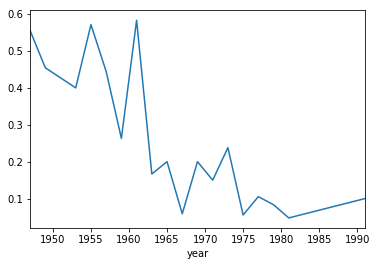

In [55]:
us_col_perc = votes_joined[(votes_joined.country_name == 'UNITED STATES') & (votes_joined.co == 1)].groupby('year')['vote'].value_counts(normalize=True)
us_col_perc.loc[:,1].plot()